# 기계학습 (1130) 12주차

김보람  
2022-11-30

> 순환신경망 minor topics

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-zvqUvbaN9PkKWMHadj8B3W>

# imports

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt 
from fastai.text.all import *
import pytorch_lightning as pl 

# Define some funtions

In [ ]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

# 순환신경망 표현력 비교실험 (1)

## data: abcabC

In [ ]:
txt = list('abcabC')*100
txt[:8]
txt_x = txt[:-1] 
txt_y = txt[1:]

In [ ]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float()

In [ ]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

In [ ]:
x.shape

## 실험

`-` 실험1

In [ ]:
HIDDEN = 3

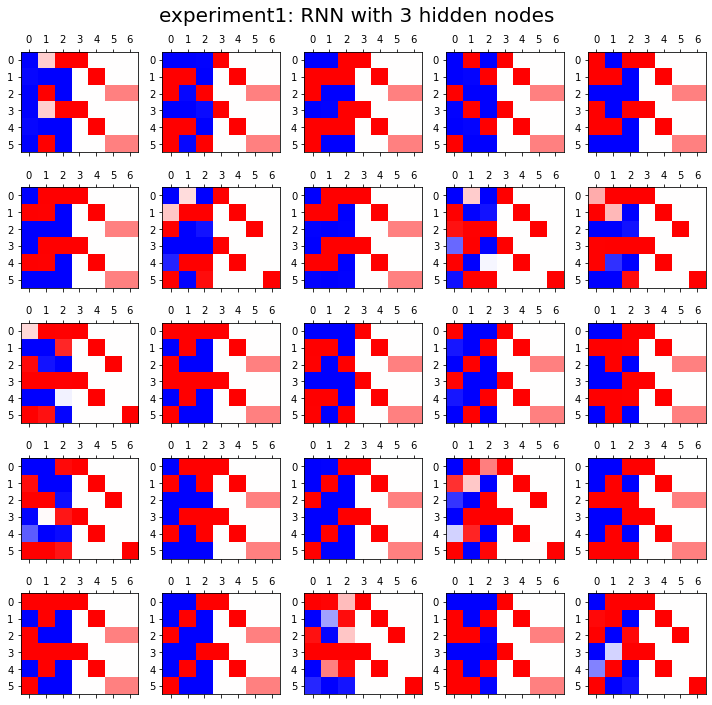

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험2

In [ ]:
HIDDEN = 4

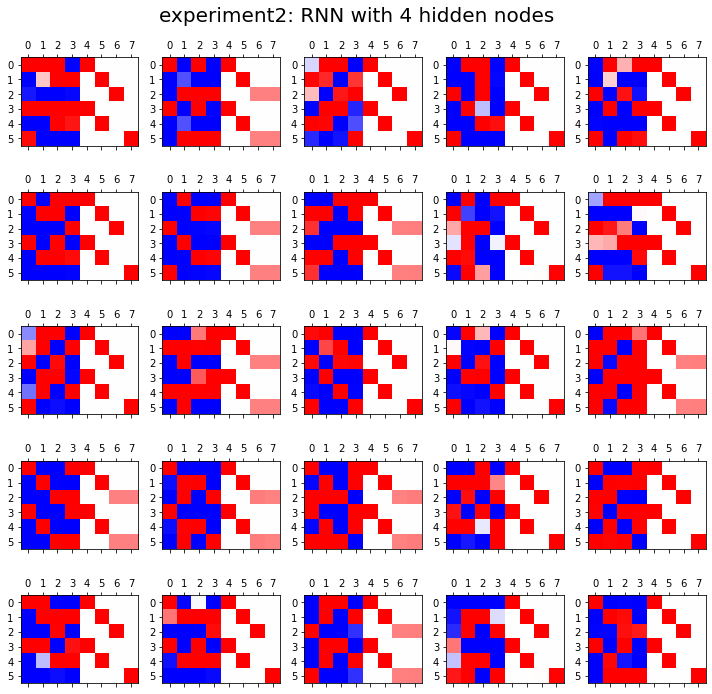

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

`-` 실험3

In [ ]:
HIDDEN = 8

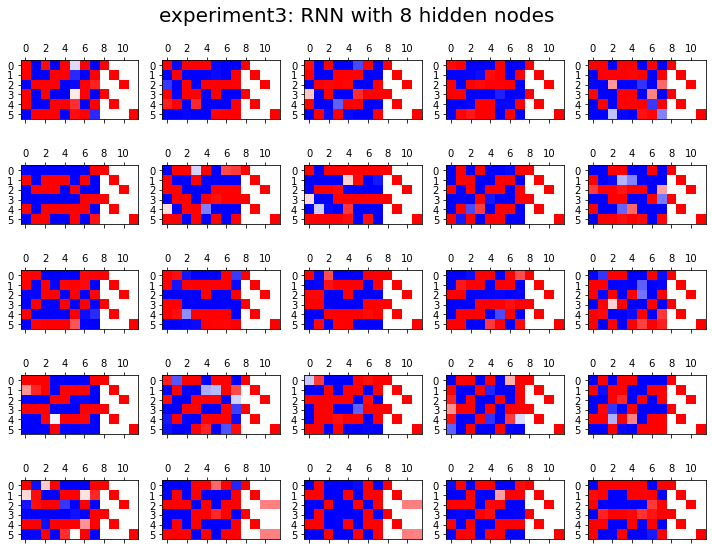

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,8))
for i in range(5):
    for j in range(5):
        rnn = torch.nn.RNN(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(rnn.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, hT = rnn(x,_water)
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combind = torch.concat([hidden,yhat],axis=1)
        ax[i][j].matshow(combind.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment3: RNN with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 많으면 학습에 유리함

# 순환신경망 표현력 비교실험 (2)

## data: ab(c,C)

In [ ]:
# torch.manual_seed(43052)
# txta = 'a'*50
# txtb = 'b'*50
# prob_upper = torch.bernoulli(torch.zeros(50)+0.5) 
# txtc = list(map(lambda x: 'c' if x==1 else 'C', prob_upper))
# txt = ''.join([txta[i]+','+txtb[i]+','+txtc[i]+',' for i in range(50)]).split(',')[:-1]
# txt_x = txt[:-1] 
# txt_y = txt[1:]
# pd.DataFrame({'txt_x':txt_x,'txt_y':txt_y}).to_csv("2022-11-25-ab(c,C).csv",index=False)

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-ab(c%2CC).csv")
df

In [ ]:
mapping = {'a':0,'b':1,'c':2,'C':3} 
x= torch.nn.functional.one_hot(torch.tensor(f(df.txt_x,mapping))).float()
y= torch.nn.functional.one_hot(torch.tensor(f(df.txt_y,mapping))).float()

In [ ]:
x = x.to("cuda:0")
y = y.to("cuda:0") 

## 실험

`-` 실험1

In [ ]:
HIDDEN = 3

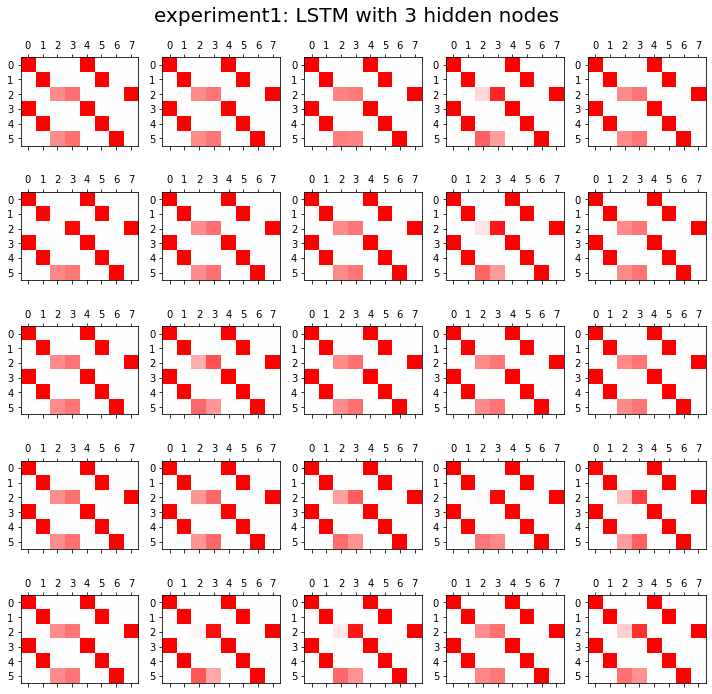

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment1: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

# 2행 4열->과적합되어있음.. c,C 확실히 알수 없는데 확실하게 맞추고있네? -> 과적합이라고 보자!

`-` 실험2

In [ ]:
HIDDEN = 16

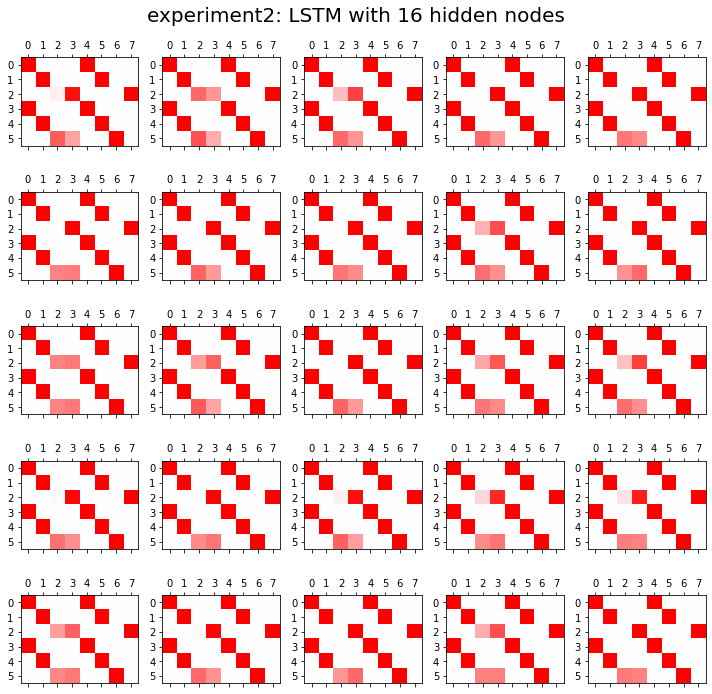

In [ ]:
fig, ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        lstm = torch.nn.LSTM(4,HIDDEN).to("cuda:0")
        linr = torch.nn.Linear(HIDDEN,4).to("cuda:0")
        loss_fn = torch.nn.CrossEntropyLoss()
        optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)
        _water = torch.zeros(1,HIDDEN).to("cuda:0")
        for epoc in range(500):
            ## 1
            hidden, (hT,cT) = lstm(x,(_water,_water))
            output = linr(hidden)
            ## 2
            loss = loss_fn(output,y)
            ## 3
            loss.backward()
            ## 4 
            optimizr.step()
            optimizr.zero_grad()
        yhat=soft(output)    
        combinded = torch.concat([yhat,y],axis=1)
        ax[i][j].matshow(combinded.to("cpu").data[-6:],cmap='bwr',vmin=-1,vmax=1)
fig.suptitle("experiment2: LSTM with {} hidden nodes".format(HIDDEN),size=20)
fig.tight_layout()

## 결론

`-` 노드수가 너무 많으면 오버피팅 경향도 있음

# 문자열에서 단어로

## data: human numbers 5

In [ ]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [ ]:
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
mapping

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:] 

In [ ]:
txt_x[0:5], txt_y[0:5]

In [ ]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## torch를 이용한 learn

In [ ]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0")                  #히든레이어 20개
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()                    #손실함수 적당히 정의해주기
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
_water = torch.zeros(1,20).to("cuda:0")
for epoc in range(50):
    ## 1 
    hidden, (hT,cT) =lstm(x,(_water,_water))
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

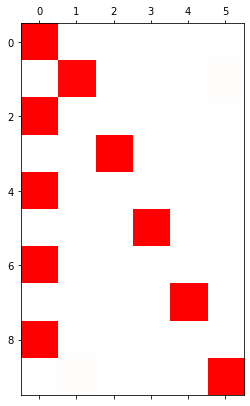

In [ ]:
plt.matshow(soft(output).data[-10:].to("cpu"),cmap='bwr',vmin=-1,vmax=1)

## fastai 이용한 learn

In [ ]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998)  #X의 full batch사이즈임
dl2 = torch.utils.data.DataLoader(ds2,batch_size=998) # dummy    #test에 해당하는 거.. 그냥 트레이닝이랑 똑같이 만들자. dls가 두개를 이용해서 만들어야 하니까 
dls = DataLoaders(dl1,dl2) #데이터로드 두개를 이용해서 만들어야 한다.

In [ ]:
# lrnr=Learner(dls,net,loss_fn) 이렇게 하려고 했는데 
# loss_fn은 만들 수 있어
# 근데 net에서.. 두개의 네트워크를 같이 쓰고 있으니까 이걸 하나의 네트워크로 통일해서 넣기가 애매하다. lstm을 넣어야할지? linear를 넣어야할지? 애매함.
# 두개이 연속동작을 한번에 해야해
# class이용해서 해보자!

In [ ]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = torch.nn.LSTM(6,20)
        self.linr = torch.nn.Linear(20,6) 
    def forward(self,x):
        _water = torch.zeros(1,20).to("cuda:0")
        hidden, (hT,cT) =self.lstm(x,(_water,_water))
        output = self.linr(hidden)
        return output         

In [ ]:
net = MyLSTM().to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
lrnr = Learner(dls,net,loss_fn,lr=0.1)

In [ ]:
lrnr.fit(50)

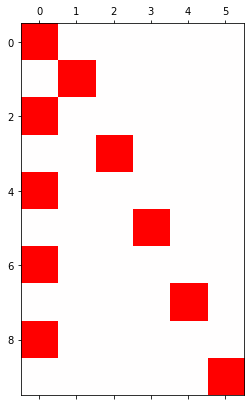

In [ ]:
plt.matshow(soft(lrnr.model(x)[-10:]).data.to("cpu"),cmap = 'bwr', vmin=-1,vmax=1)

# 똑같은 코드들: `torch.nn.LSTM`

## data: hi?hello!!

In [ ]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## 세트1: \_water의 생략

`-` 코드1: 정석코드

In [ ]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [ ]:
_water = torch.zeros(1,4).to("cuda:0")
lstm(x, (_water,_water))

In [ ]:
# 히든레이거 값
# HT
# CT

`-` 코드2: \_water 는 사실 없어도 괜찮았어..

In [ ]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [ ]:
lstm(x)

## 세트2: x.shape = ($L$, $H_{in}$) or ($L$,$N$,$H_{in}$)

`-` 파라메터 설명

-   $L$ = sequece length = 시계열의 길이 = 간장을 몇 년 전통으로
    이어갈지 (time시리지의 length)
-   $N$ = batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체
    데이터를 몇개의 시계열로 쪼갤지 \<– 왜 이걸 해야해?
-   $H_{in}$ = input_size = 시점을 고정하였을 경우 입력자료의 차원 =
    입력시계열이 시점별로 몇개의 변수로 나타내어 지는지? = 만약에
    원핫인코딩으로 단어를 정리하면 단어수를 의미함

In [ ]:
# x.shape = [999,7]  <- len가 999이고 구별되는 것이 7개 
# 7개 이거를 Hin으로 생각.. 
# Hin: Hnet 라고 생각..
# x,shape=[999,N,Hin] 이렇게 생긴 N이 있대 

# Hin "시점을 고정했을때"   만약 x[0] = 0., 0., 1., 0., 0.,  h를 2로 맵핑했으니까 저 1은 h를 의미해 
# 즉 하나의 시점에는 7개 차원인 정보들에 대한 입력..! 

# 만약 x.shape=[1000,7] dlaus 1000x7인데, 반으로 쪼개서 500x7, 500x7로 만들면 여기서 N=2이다.
# 지금우리는 쪼개고 있지 않고 N=1로ㅓ만 진행하눈중 

`-` 코드2: \_water 는 사실 없어도 괜찮았어..

In [ ]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [ ]:
lstm(x)

`-` 코드3: x의 차원은 사실 엄밀하게는 ($L$,$N$,$H_{in}$) 와 같다…

In [ ]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [ ]:
lstm(x.reshape(999,1,7))
# lstm(x) 한것과 같은 숫자가 나온당.
# batch_first=False가 기본 

`-` 코드4: `batch_first=True`옵션을 사용하여 lstm을 만든경우

In [ ]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4,batch_first=True).to("cuda:0")

In [ ]:
# lstm(x.reshape(999,1,7)) 하면 값이 이상하게 나온다! 
# batch_first=true옵션을 사용하면 (N,L,Hin) 으로 써줘야 한당. 

In [ ]:
lstm(x.reshape(1,999,7))

## 세트3: hidden.shape = ($D\times$ `num_layers`, $H_{out}$) or ($D\times$ `num_layers`, $N$, $H_{out}$)

`-` 파라메터 설명

-   $D$ = 2 if bidirectional=True otherwise 1 = 양방향이면 2, 단방향이면
    1 (우리는 단방향만 배움)
-   `num_layres` = 중첩된 RNN일 경우 (우리는 중첩을 안시켰음)
-   $N$ = batch size = 전체데이터는 몇 개의 시계열이 있는지 = 전체
    데이터를 몇개의 시계열로 쪼갤지 \<– 왜 이걸 해야해?
-   $H_{out}$ = 히든노드의 수

In [ ]:
# _water는 (1,히든)이였는데 여기서 1은 D X num_layers의 계산값이였다. 
# num_layres는 중첩시킨적없어서 이값도 1
# N= 쪼갠적없으니까 1


`-` 코드5: x.shape = ($L$,$1$,$H_{in}$) $\to$ hidden.shape =
($1$,$1$,$H_{out}$)

In [ ]:
torch.manual_seed(43052)
lstm = torch.nn.LSTM(7,4).to("cuda:0")

In [ ]:
_water = torch.zeros(1,1,4).to("cuda:0")    #zeros(1,4)하면 차원 에러가남 
lstm(x.reshape(999,1,7),(_water,_water))

`-` 사실 \_water.shape = (1,$H_{out}$) 에서 1은 observation의 차원을
의미하는게 아님 (그런데 대충 그렇게 생각해도 무방함)

-   한 시점의 콩물에 대하여 양방향으로 간장을 만들면 \_water.shape =
    (2,h)
-   한 시점의 콩물에 대하여 3중첩으로 간장을 만들면 \_water.shape =
    (3,h)
-   한 시점의 콩물에 대하여 3중첩간장을 양방향으로 만들면 \_water.shape
    = (6,h)

In [ ]:
# 원래 1은 D X 넘버오브레이어인데 

# 똑같은 코드들: `torch.nn.LSTMCell`

## data: hi?hello!!

In [ ]:
txt = list('hi?hello!!')*100 
txt_x = txt[:-1]
txt_y = txt[1:]

In [ ]:
mapping = {'!':0, '?':1,'h':2,'i':3,'e':4,'l':5,'o':6} 
x= torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y= torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## 세트1: \_water의 생략

`-` 코드1: 정석코드

In [ ]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [ ]:
xt = x[[1]]
_water = torch.zeros(1,4).to("cuda:0")
xt.shape, _water.shape

In [ ]:
lstmcell(xt,(_water,_water))

`-` 코드2: \_water의 생략

In [ ]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [ ]:
xt = x[[1]]
xt.shape

In [ ]:
lstmcell(xt)

## 세트2: xt.shape = ($N$,$H_{in}$) or ($H_{in}$)

`-` 코드2: \_water의 생략

In [ ]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [ ]:
xt = x[[1]]
xt.shape

In [ ]:
lstmcell(xt)

`-` 코드3:

In [ ]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [ ]:
xt = x[1]
xt.shape

In [ ]:
lstmcell(xt)

## 세트3: hidden.shape = ($N$,$H_{out}$) or ($H_{out}$)

`-` 코드4: xt.shape = ($H_{in}$) $\to$ \_water.shape = $(H_{out})$

In [ ]:
torch.manual_seed(43052) 
lstmcell = torch.nn.LSTMCell(7,4).to("cuda:0") 

In [ ]:
xt = x[1]
_water = torch.zeros(4).to("cuda:0")
xt.shape,_water.shape

In [ ]:
lstmcell(xt, (_water,_water))

# Summary

## 똑같은 코드들 정리

`-` 원래 1은 단순히 observation의 차원이 아니다. 즉
${\bf X}_{n \times p}$에서 $n$에 대응하는 차원으로 생각할 수 없다.

`-` 그런데 (1) 단방향 (2) 조각내지 않은 시계열 (3) 중첩하지 않은
순환망에 한정하여서는 observation 처럼 생각해도 무방하다. \<– 엄밀하게는
이게 위험한 생각임. 하지만 정식으로 모두 따지려면 너무 헷갈림

## 실제구현시 기억할 것

`-` 현실적으로 (1)-(3)이 아닌 조건에서는 Cell 단위로 연산을 이용할 일이
없다. (느리거든요) // 그냥 이해용으로 구현

`-` torch.nn.RNN 혹은 torch.nn.LSTM 으로 네트워크를 구성할시 \_water의
dim을 명시할 일도 없다.

`-` 오로지 고려해야 할 것은 입력시계열을 조각낼지 조각내지 않을지

# 조각난 시계열로 학습

## data

In [ ]:
txt = list('hi!')*3 + list('hi?')*3 

## 조각내지 않은 시계열

In [ ]:
txt_x = txt[:-1] 
txt_y = txt[1:] 

In [ ]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [ ]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [ ]:
plt.matshow(soft(output)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)
# 이것도 밑 그래프랑 같은! 

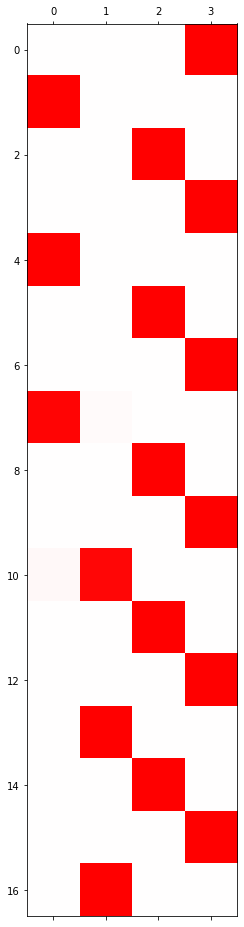

In [ ]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

## 조각난 시계열

In [ ]:
txt1= txt[:9]
txt2= txt[9:]

In [ ]:
txt1,txt2

In [ ]:
txt1_x = txt1[:-1] 
txt1_y = txt1[1:] 
txt2_x = txt2[:-1] 
txt2_y = txt2[1:] 

In [ ]:
mapping = {'!':0, '?':1, 'h':2, 'i':3} 
x1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_x,mapping))).float().to("cuda:0")
y1 = torch.nn.functional.one_hot(torch.tensor(f(txt1_y,mapping))).float().to("cuda:0")
x2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_x,mapping))).float().to("cuda:0")
y2 = torch.nn.functional.one_hot(torch.tensor(f(txt2_y,mapping))).float().to("cuda:0")

In [ ]:
x1.shape, y1.shape, x2.shape, y2.shape

In [ ]:
xx = torch.stack([x1,x2],axis=1)   # x1과 x2를 합치자
yy = torch.stack([y1,y2],axis=1)
xx.shape, yy.shape

In [ ]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(xx) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output[:,0,:],yy[:,0,:]) + loss_fn(output[:,1,:],yy[:,1,:])
    # (8,4), (8,4)가 stack되어있는데 첫번째 스택 봅고. yy도 뽑고.. 그럼 로스가 한번 계산이 되는데 다시 로스를 더하면 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

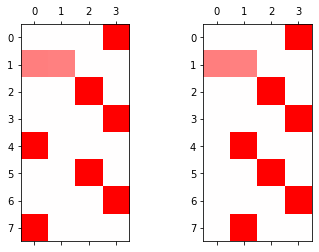

In [ ]:
fig , ax = plt.subplots(1,2) 
ax[0].matshow(soft(output[:,0,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)
ax[1].matshow(soft(output[:,1,:]).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

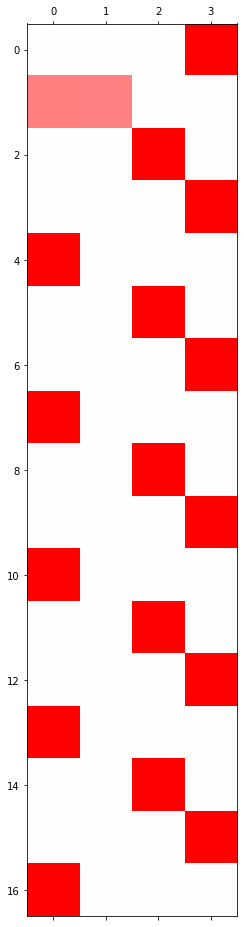

In [ ]:
hidden, _ = lstm(x)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

`-` 조각난 시계열로 학습한 경우는 hi!에서 hi?로 바뀔 수 없다. 왜냐햐면
그러한 연결정보가 끊어져 있으니까

## 재미있는 실험

`-` x1만 배운다면?

In [ ]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x1) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y1)
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

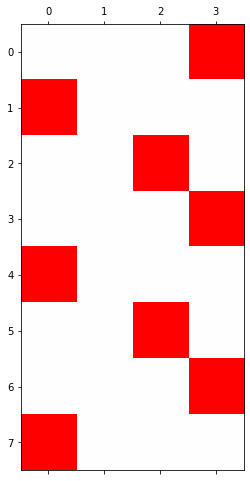

In [ ]:
hidden, _ = lstm(x2)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

`-` x2만 배운다면?

In [ ]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(4,10).to("cuda:0")
linr = torch.nn.Linear(10,4).to("cuda:0")

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss() 
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(100):
    ## 1 
    hidden, _ = lstm(x2) 
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y2)
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

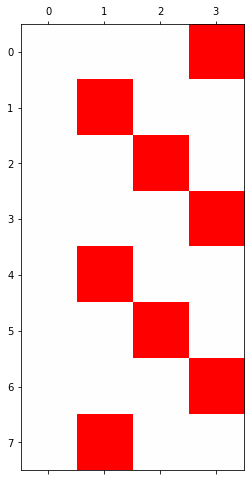

In [ ]:
hidden, _ = lstm(x1)
plt.matshow(soft(linr(hidden)).to("cpu").data,cmap='bwr',vmin=-1,vmax=1)

# 똑같은 코드들 fastai, pytorch

## data: human numbers 5

In [ ]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]

In [ ]:
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
mapping

In [ ]:
txt_x = txt[:-1]
txt_y = txt[1:] 

In [ ]:
txt_x[0:5], txt_y[0:5]

In [ ]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

## fastai 이용한 learn

In [ ]:
ds1 = torch.utils.data.TensorDataset(x,y)
ds2 = torch.utils.data.TensorDataset(x,y) # dummy 
dl1 = torch.utils.data.DataLoader(ds1,batch_size=998)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=998) # dummy 
dls = DataLoaders(dl1,dl2) 

In [ ]:
class MyLSTM(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(43052)
        self.lstm = torch.nn.LSTM(6,20)
        self.linr = torch.nn.Linear(20,6) 
    def forward(self,x):
        _water = torch.zeros(1,20).to("cuda:0")
        hidden, (hT,cT) =self.lstm(x,(_water,_water))
        output = self.linr(hidden)
        return output         

In [ ]:
net = MyLSTM().to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
lrnr = Learner(dls,net,loss_fn,lr=0.1)

In [ ]:
lrnr.fit(10)

In [ ]:
soft(lrnr.model(x)).data.to("cpu").numpy().round(3)

## torch를 이용한 learn

In [ ]:
torch.manual_seed(43052) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [ ]:
for epoc in range(10):
    ## 1 
    hidden, _ = lstm(x)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

In [ ]:
hidden, _ = lstm(x)
output = linr(hidden) 
soft(output).data.to("cpu").numpy().round(3)

# human numbers 100

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/main/posts/IV.%20RNN/2022-11-25-human_numbers_100.csv')
df

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. - is_lm
= True 로 설정할 것 - seq_len = 5 로 설정할 것

(풀이)

In [ ]:
dls = TextDataLoaders.from_df(df,is_lm=True,seq_len=5,text_col='text')
dls.show_batch()

`(2)` lrnr 오브젝트를 만들어라. - arch = AWD_LSTM 이용 - metrics =
accuracy 이용

(풀이)

In [ ]:
lrnr = language_model_learner(dls, arch= AWD_LSTM, metrics=accuracy)

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라.

(풀이)

In [ ]:
lrnr.fine_tune(3)

`(4)` ‘one , two ,’ 이후에 이어질 50개의 단어를 생성하라.

(풀이)

In [ ]:
lrnr.predict('one, two,', n_words=50) 

`(5)` ‘twenty , twenty one ,’ 이후에 이어질 50개의 단어를 생성하라.

(풀이)

In [ ]:
lrnr.predict('twenty, twenty one,', n_words=50) 